## https://lifelines.readthedocs.io/en/latest/Quickstart.html#getting-data-in-the-right-format

In [1]:
import sys
sys.executable

'/home/ing/miniconda3/envs/milk/bin/python'

In [2]:
import pandas as pd
import lifelines
import pickle

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np
import glob
predicted_sets = glob.glob('../tcga-prad/2019_01_23_22_21_15/*_ypred.npy')
print(len(predicted_sets))
ypred = {}
for pth in predicted_sets:
    c = os.path.basename(pth)[:12]
    y = np.squeeze(np.argmax(np.load(pth), -1))
    print(c,y)
    ypred[c] = y
    

42
TCGA-KK-A6DY 1
TCGA-YL-A8S8 0
TCGA-V1-A9Z7 1
TCGA-G9-6496 0
TCGA-HC-8260 1
TCGA-EJ-7123 0
TCGA-G9-7521 1
TCGA-X4-A8KQ 1
TCGA-YL-A8SH 1
TCGA-HC-A9TE 1
TCGA-HC-8262 1
TCGA-J4-A67T 0
TCGA-V1-A8WN 0
TCGA-YL-A9WI 0
TCGA-V1-A8MU 0
TCGA-YL-A9WI 0
TCGA-HC-7232 0
TCGA-QU-A6IN 0
TCGA-YL-A8SP 1
TCGA-Y6-A8TL 1
TCGA-CH-5754 0
TCGA-V1-A8X3 0
TCGA-EJ-7789 1
TCGA-EJ-A46E 0
TCGA-J4-A67K 0
TCGA-G9-6343 1
TCGA-G9-6494 0
TCGA-EJ-A46B 0
TCGA-EJ-A46G 0
TCGA-MG-AAMC 0
TCGA-HI-7169 1
TCGA-HC-7077 0
TCGA-QU-A6IL 0
TCGA-FC-7708 0
TCGA-EJ-5504 1
TCGA-V1-A9O5 1
TCGA-VP-A87E 1
TCGA-KK-A59Y 0
TCGA-KK-A7B3 1
TCGA-2A-A8W1 0
TCGA-YL-A8SB 1
TCGA-G9-6379 0


In [4]:
# translate the pickled data:
days_to_biochem_recurr = pickle.load(open('../prad_days_to_biochemical_recurrence.pkl', 'rb'))
print(len(days_to_biochem_recurr.keys()))

427


22
16


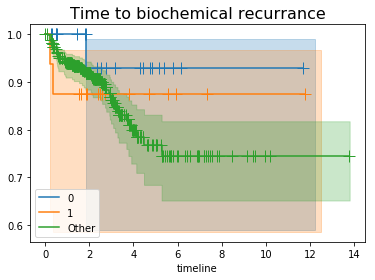

In [5]:
T_0, E_0 = [], []
T_1, E_1 = [], []
T, E = [], []
for k, v in days_to_biochem_recurr.items():
    if k in ypred.keys():
        if ypred[k] == 0:
            T_0.append(v[0] / 365)
            E_0.append(v[1])
        else:
            T_1.append(v[0] / 365)
            E_1.append(v[1])
    else:
        T.append(v[0] / 365)
        E.append(v[1])
            
print(len(T_0))
print(len(T_1))
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T_0, E_0, label='0')
ax = kmf.plot(show_censors=True)
kmf.fit(T_1, E_1, label='1')
ax = kmf.plot(show_censors=True, ax=ax)
kmf.fit(T, E, label='Other')
ax = kmf.plot(show_censors=True, ax=ax)
ax.set_title('Time to biochemical recurrance', fontsize=16)
plt.savefig('prad_km_time_to_biochem_recurrance.png', bbox_inches='tight')
# plt.legend(fontsize=14)

In [6]:
result = lifelines.statistics.logrank_test(T_0, T_1, event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()
print(result.p_value)
print(result.test_statistic)
print('------------------------------------------------------------')

result = lifelines.statistics.survival_difference_at_fixed_point_in_time_test(5, durations_A=T_0, durations_B=T_1,
    event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic    p  -log2(p)
          0.64 0.42      1.24
0.42238858564521853
0.6436599215709053
------------------------------------------------------------
<lifelines.StatisticalResult>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 5

---
test_statistic    p  -log2(p)
          0.23 0.63      0.66


In [7]:
days_to_new_tumor = pickle.load(open('../prad_days_to_new_tumor_event.pkl', 'rb'))

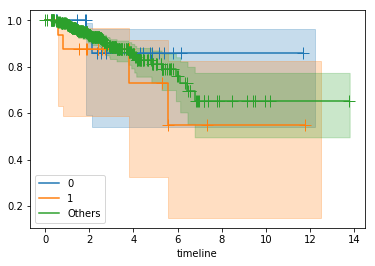

In [8]:
T_0, E_0 = [], []
T_1, E_1 = [], []
T, E = [], []
for k, v in days_to_new_tumor.items():
    if k in ypred.keys():
        if ypred[k] == 0:
            T_0.append(v[0] / 365)
            E_0.append(v[1])
        else:
            T_1.append(v[0] / 365)
            E_1.append(v[1])
    else:
        T.append(v[0] / 365)
        E.append(v[1])
            
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T_0, E_0, label='0')
ax = kmf.plot(show_censors=True)
kmf.fit(T_1, E_1, label='1')
ax = kmf.plot(show_censors=True, ax=ax)
kmf.fit(T, E, label='Others')
ax = kmf.plot(show_censors=True, ax=ax)

In [9]:
result = lifelines.statistics.logrank_test(T_0, T_1, event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()
print(result.p_value)
print(result.test_statistic)
print('------------------------------------------------------------')

result = lifelines.statistics.survival_difference_at_fixed_point_in_time_test(5, durations_A=T_0, durations_B=T_1,
    event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic    p  -log2(p)
          0.87 0.35      1.51
0.3510336381191045
0.8697171039560739
------------------------------------------------------------
<lifelines.StatisticalResult>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 5

---
test_statistic    p  -log2(p)
          0.56 0.46      1.13
